# Supervised Learning and K Nearest Neighbors Exercises

In [ ]:
Saiprasanna Cheedepudi
856496421

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
import os
path_of_dataset = ['data']

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [7]:
import pandas as pd
dataset = os.sep.join(path_of_dataset + ['Orange_Telecom_Churn_Data.csv'])
#dataset = os.sep.join( ['Orange_Telecom_Churn_Data.csv'])
df = pd.read_csv(dataset)
#write your code here
#Display the data
df.iloc[:5]
#df.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,415,415,415,408,415
phone_number,382-4657,371-7191,358-1921,375-9999,330-6626
intl_plan,no,no,no,yes,yes
voice_mail_plan,yes,yes,no,no,no
number_vmail_messages,25,26,0,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7
total_day_calls,110,123,114,71,113
total_day_charge,45.07,27.47,41.38,50.9,28.34


#Write the explanation of the second part of Question 1 here

In [ ]:
State, area_code and phone number can dropped from the data set since these column values are independent and will not have impact on the target column.

In [11]:
#write your code here
#dropping the columns from data set
df.drop(['state','area_code','phone_number'],axis=1,inplace=True)

In [13]:
#write your code here
#Displaying the columns of data set
df.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [14]:
#write your code here
#Display the resultant data set
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded. We applied LabelBinarizer for that. You don't need to change anything for that.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [15]:
from sklearn.preprocessing import LabelBinarizer

LabelBin = LabelBinarizer()

for nonnum in ['intl_plan', 'voice_mail_plan','churned']:
    df[nonnum] = LabelBin.fit_transform(df[nonnum])

In [16]:
#write your code here. print the dataset head.
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [20]:
import warnings
warnings.filterwarnings('ignore',module='sklearn')
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

#write your code here
#minmaxscale = MinMaxScaler(feature_range=(1,5))
minmaxscale = MinMaxScaler()
df = pd.DataFrame(minmaxscale.fit_transform(df),columns=df.columns)

In [21]:
#write your code here. print the dataset head.
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [33]:
#write your code here
x_new = [x for x in df.columns if x!='churned']
         
x_value = df[x_new]


         
y_value = df['churned']

x_value.head()


,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333


In [34]:
from sklearn.neighbors import KNeighborsClassifier


#write your code here
knc = KNeighborsClassifier(n_neighbors=3)

knc = knc.fit(x_value,y_value)

y_predict = knc.predict(x_value)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [36]:
def model_accuracy(real,predict):
    return sum(real == predict) / float(real.shape[0])

In [37]:
#write your code here
print(model_accuracy(y_value,y_predict))

0.9422


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3`, but we want to apply a strategy through which the distance of neighbors will be counted or valued. So, this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [38]:
#write your code here
knc = KNeighborsClassifier(n_neighbors=3,weights='distance')

knc = knc.fit(x_value,y_value)

y_predict = knc.predict(x_value)
print(model_accuracy(y_value,y_predict))

1.0


#write your explanation here
model is overfitting


In [ ]:
Model is overfitting. For every data set the value of k may vary to predict whether the method is overfitting or not but the variance would be high at these models.

In [39]:
#write your code here
knc = KNeighborsClassifier(n_neighbors=3,p=1)

knc = knc.fit(x_value,y_value)

y_predict = knc.predict(x_value)
print(model_accuracy(y_value,y_predict))

0.9456


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [54]:
#write your code here
score_li=list()
for k in range(1,21):
    knc = KNeighborsClassifier(n_neighbors=k)

    knc = knc.fit(x_value,y_value)

    y_predict = knc.predict(x_value)
    score = model_accuracy(y_value,y_predict)
    score_li.append((k,score))
    
scoredf = pd.DataFrame(score_li,columns = ['k','accuracy'])
scoredf

,k,accuracy
0,1,1.0000
1,2,0.9292
2,3,0.9422
3,4,0.9154
4,5,0.9284
5,6,0.9156
6,7,0.9254
7,8,0.9122
8,9,0.9224
9,10,0.9092


In [45]:
#write your code here


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Text(0.5, 1.0, 'k versus accuracy')

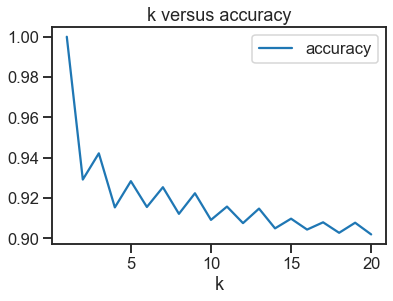

In [52]:
#write your code here
sns.set_context('talk')
sns.set_style('ticks')

axis = scoredf.set_index('k').plot()
plt.title("k versus accuracy")

#write your explanation here

In [ ]:
For instance in this model at k=1, the model is overfitting. 